## The Dataset
* Column 1 is weight
* Column 2 is feed type

## The data looks like this:

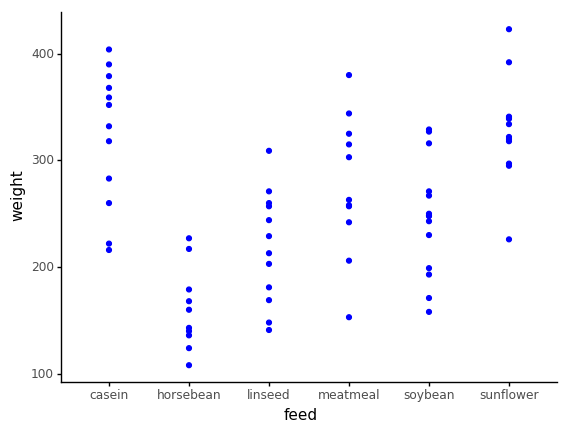

<ggplot: (6145616858)>

In [7]:
import pandas
chicks = pandas.read_csv("chickwts.txt")
import plotnine
from plotnine import *
p=(ggplot(data=chicks) +
    aes(x="feed",y="weight") +
    geom_point(color="blue") +
    theme_classic())
p

## Is chick weight different when they're fed soybean feed vs sunflower feed?
### Hypotheses:
* Null hypothesis: There's no difference

In [9]:
def null(p,obs):
    B0=p[0]
    sigma=p[1]
    
    expected=B0
    nll= -1*scipy.stats.norm(expected,sigma).logpdf(chicks.feed).sum()
    return nll

* Alternate hypothesis:

In [10]:
def alter(p,obs):
    B0=p[0]
    B1=p[1]
    sigma=p[2]
    
    expected=B0+B1*obs.mutation
    nll= -1*scipy.stats.norm(expected,sigma).logpdf(chicks.feed).sum()
    return nll

### Then we have to subset the data to only include chicks fed soybeans or sunflowers:
#### Note: Must change feed names to integers so that numpy can understand
* soybean=1 
* sunflower=2

In [15]:
chicks = pandas.read_csv("chickwts.txt")
subset1 = chicks.loc[chicks.feed.isin(['1','2']),:]

## Let's test it using a likelihood ratio test!
#### First import your packages

In [12]:
import numpy
import scipy
from scipy import optimize
from scipy import stats
from scipy.stats import norm


#### The fit

In [16]:
initialGuess=numpy.array([1,1])
alterGuess=numpy.array([1,1,1])
fitNull=scipy.optimize.minimize(null,initialGuess,method="Nelder-Mead",options={'disp':True},args=subset1)
fitAlter=scipy.optimize.minimize(alter,alterGuess,method="Nelder-Mead",options={'disp':True},args=subset1)
print(fitNull)
print(fitAlter)

Optimization terminated successfully.
         Current function value: 140.784019
         Iterations: 48
         Function evaluations: 90


AttributeError: 'DataFrame' object has no attribute 'mutation'

In [ ]:
#### The results

In [8]:
D=2*(fitNull.fun-fitAlter.fun)
1-scipy.stats.chi2.cdf(x=D,df=1)
print(D)

NameError: name 'fitNull' is not defined